### Algoritmo de Canny
En un principio se trataba de localizar el iris, pero como se detalla más abajo, no lo he conszeguido, ya que únicamente se localizaba la pupila.

https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html

https://www.pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/

El detector de bordes de Canny (Canny edge detector) fue desarrollado por John F. Canny en 1986 y actualmente sigue siendo ampliamente usado en el procesamiento de imágenes.

El algoritmo consta de 5 pasos.

1. Suavizar la imagen usando el filtro Gaussiano para eliminar el ruido(alteración del brillo y color en imágenes)
2. Encontrar la intensidad del gradiente de la imgen
3. Aplicar supresión no máxima(non-maximum suppresion)para eliminar píxeles que no son considerados parte de un borde.
4. Aplicar __hysteresys thresholding__, usará 2 umbrales(_upper_ and _lower_):
    1. Si un pixel del gradiente es mayor que el umbral _upper_, el píxel será aceptado como parte del borde.
    
    2. Si un píxel del gradiente es menor que el umbral _lower_ el píxel se descartará.
    3. Si el píxel del gradiente está entre los 2 umbrales, será aceptado únicamente si está conectado a un píxel que se encuentre por encima del umbral _upper_

Se hará uso de la implementación ofrecida por OpenCV:
`cv2.canny(image,lower,upper)`

 En la que `image`es la imagen con los bordes a detectar y `lower`y `upper` son los umbrales límite.
 
 El problema surge a la hora de determinar que umbrales son los apropiados.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import data

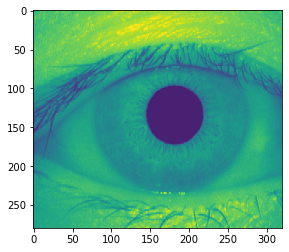

In [3]:
path_img = "CASIA_v1" + os.sep + "001_1_1.bmp"
img = data.imread(path_img)
plt.imshow(img);

## Thresholding

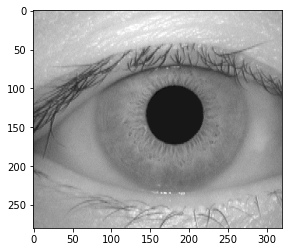

In [6]:
# El thresholding se aplica a imágenes en blanco y negro
gray_img = data.imread(path_img, as_gray=True)
plt.imshow(gray_img, 'gray');

Una forma de determinar los umbrales de manera automática, sería usando la mediana de las intensidades de los píxeles de la imagen.

In [10]:
# Canny "manual"
canny_edge = cv2.Canny(img,50,80)


# Canny "automático"
sigma = 0.7 # valor bajo de sigma proporciona un umbral más ajustado, mientras que uno alto, proporcionará uno más amplio
median = np.median(img) 

# apply automatic Canny edge detection using the computed median
lower = int(max(0, (1.0 - sigma) * median)) # lower of double threshold
upper = int(min(255, (1.0 + sigma) * median))  # upper of double threshold
auto_canny = cv2.Canny(img, lower, upper)

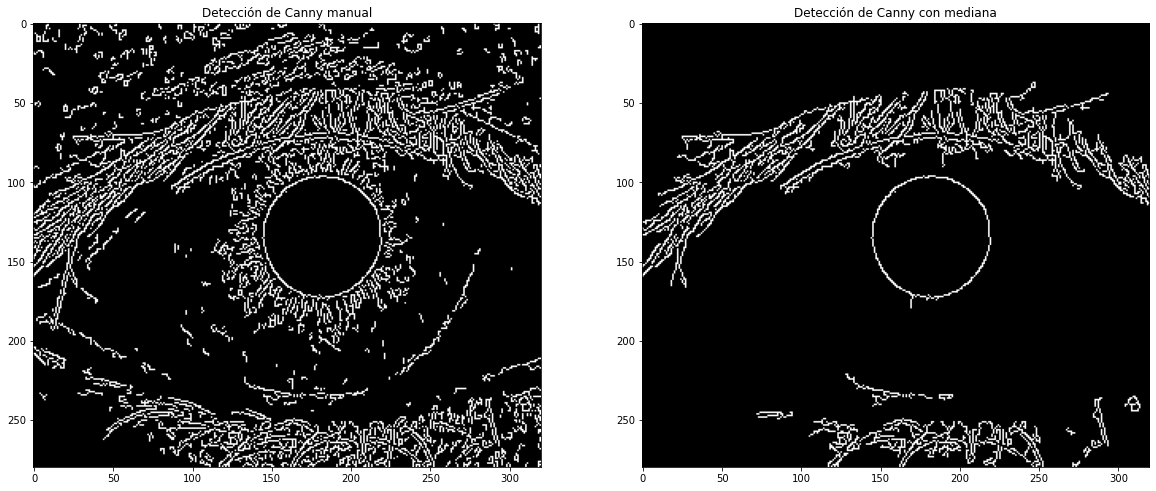

In [11]:
fig, axes = plt.subplots(1,2,figsize=(20,20))
axes[0].imshow(canny_edge,cmap='gray')
axes[0].set(title="Detección de Canny manual")
axes[1].imshow(auto_canny,cmap='gray')
axes[1].set(title="Detección de Canny con mediana");

Número de contornos en el Canny manual: 834
Número de contornos en el Canny con mediana : 72


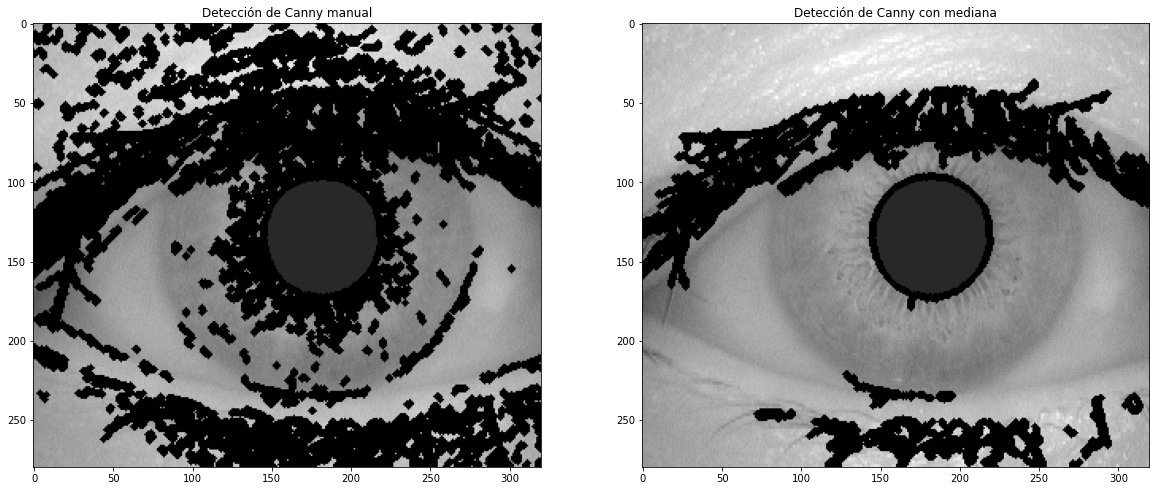

In [12]:
temp_img = img.copy()
contours_manual, hierarchy_manual = cv2.findContours(canny_edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
contours_median, hierarchy_median = cv2.findContours(auto_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
print("Número de contornos en el Canny manual: " + str(len(contours_manual))) 
print("Número de contornos en el Canny con mediana : " + str(len(contours_median))) 
manual = cv2.drawContours(img, contours_manual, -1, (0, 255, 0), 3)
auto = cv2.drawContours(temp_img, contours_median, -1, (0, 255, 0), 3)

fig, axes = plt.subplots(1,2,figsize=(20, 20))
axes[0].imshow(manual,cmap='gray')
axes[0].set(title="Detección de Canny manual")
axes[1].imshow(auto,cmap='gray')
axes[1].set(title="Detección de Canny con mediana");

Cómo puede observarse, el ajuste de parámetros manual, nos proporciona una imagen "más sucia" en la que se identifican bordes que no nos sirven, al contrario con el método de la mediana obtenemos también bordes innecesarios pero ya identifica el borde pupilar.